In [16]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 读取数据

In [17]:
# 读取数据
df = pd.read_csv('property_final.csv')

In [18]:
data = df.drop(['address','LOC_NAME','postcode','cloest station','cloest school'],axis=1)
data = data.iloc[:,1:14]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14725 entries, 0 to 14724
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  14725 non-null  object 
 1   station_distance      14725 non-null  float64
 2   school_distance       14725 non-null  float64
 3   CBD_distance          14725 non-null  float64
 4   cost                  14725 non-null  float64
 5   beds                  14725 non-null  int64  
 6   bath                  14725 non-null  int64  
 7   parking               14725 non-null  int64  
 8   LOC_PID               14725 non-null  object 
 9   suburb_population     14725 non-null  float64
 10  density               14725 non-null  float64
 11  offence_count_scaled  14725 non-null  float64
 12  2022_income           14725 non-null  float64
dtypes: float64(8), int64(3), object(2)
memory usage: 1.5+ MB


In [20]:
#  描述性统计分析
data.describe()

,station_distance,school_distance,CBD_distance,cost,beds,bath,parking,suburb_population,density,offence_count_scaled,2022_income
count,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000
mean,5327.451493,1050.079386,39685.520619,514.531702,2.592869,1.473752,1.343565,21491.270123,3498.964719,0.193150,59850.627625
std,21216.747908,1561.004634,66704.996074,273.818889,1.043871,0.607115,0.949589,15877.699271,3152.231668,0.145679,9832.025046
min,10.060000,0.000000,562.430000,1.000000,0.000000,0.000000,0.000000,305.083333,1.575472,0.000102,33492.142460
25%,845.930000,487.830000,7713.480000,385.000000,2.000000,1.000000,1.000000,10405.217391,1379.410527,0.099453,53761.161153
50%,1582.990000,754.570000,17006.350000,450.000000,3.000000,1.000000,1.000000,16887.163068,2728.087165,0.146133,59682.718266
75%,3133.870000,1135.560000,38126.760000,560.000000,3.000000,2.000000,2.000000,28312.440000,4335.181821,0.238650,66628.287834
max,250677.940000,48080.760000,547292.750000,5600.000000,9.000000,8.000000,9.000000,69437.181818,16912.733621,1.825052,84739.514398


# 特征预处理

In [21]:
# 数据类型转换 
dummies_type =pd.get_dummies(data['type'],prefix='type')
dummies_LOC_PID =pd.get_dummies(data['LOC_PID'],prefix='type')

# 合并原始变量和转换后的新变量
data_new =pd.concat([data, dummies_type,dummies_LOC_PID],axis=1)
data_new.head()

,type,station_distance,school_distance,CBD_distance,cost,beds,bath,parking,LOC_PID,suburb_population,...,type_locfe955a87410d,type_locfeb30fa2d21c,type_locff0c231b0f12,type_locff0c4d75067f,type_locff58d0167065,type_locff6258c8ea42,type_locff62fb6a898a,type_locffa1c8993b70,type_locffb43e78ab10,type_locffd0eebac0eb
0,Apartment / Unit / Flat,1803.65,667.06,1702.19,1800.0,3,2,2,loc9901d119afda,64537.612413,...,0,0,0,0,0,0,0,0,0,0
1,Apartment / Unit / Flat,371.68,352.49,2267.13,480.0,1,1,1,loc9901d119afda,64537.612413,...,0,0,0,0,0,0,0,0,0,0
2,Apartment / Unit / Flat,248.50,401.73,1937.39,400.0,1,1,0,loc9901d119afda,64537.612413,...,0,0,0,0,0,0,0,0,0,0
3,Apartment / Unit / Flat,404.26,586.61,790.13,420.0,1,1,0,loc9901d119afda,64537.612413,...,0,0,0,0,0,0,0,0,0,0
4,Apartment / Unit / Flat,525.08,779.91,1657.95,350.0,1,1,0,loc9901d119afda,64537.612413,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# 去掉原始分类变量
data_new.drop(['type','LOC_PID']  ,axis=1,inplace=True)

#  随机森林建模

In [23]:
# 标签，特征选取
x= data_new.drop(['cost'],axis=1)
y= data_new['cost']

#  训练集和测试集划分；
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

In [24]:
y_test.shape   # 测试集的样本数量

(2945,)

In [25]:
# 标准化处理
from sklearn.preprocessing import StandardScaler  
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [26]:
#  基于网格搜索调参  
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import   RandomForestRegressor

model = RandomForestRegressor( )
params = {  'n_estimators' : [ 200, 500,800],
            'max_depth' :   [10, 12, 15] 
         }
model = GridSearchCV(estimator=model, param_grid=params, cv=5)
model.fit(x, y)

print("模型的最优参数：",model.best_params_)

模型的最优参数： {'max_depth': 15, 'n_estimators': 800}


In [14]:
rf_model = RandomForestRegressor(n_estimators=800,max_depth=15,random_state=12345 )   

# 拟合并预测
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
y_pred1 = rf_model.predict(x_train)

In [27]:
#    计算指标
from sklearn.metrics import mean_absolute_error,  mean_squared_error,  r2_score
# 训练集的：
print('train\nMae: ', mean_absolute_error(y_train,y_pred1))
print('Mse: ',       mean_squared_error(y_train,y_pred1))
print('r2: ',       r2_score(y_train,y_pred1))
Mape = np.mean(np.abs((y_pred1-y_train)/y_train))     
print('Mape: ',"%.5f%%" % (Mape * 100))  
print('accuracy: ',"%.5f%%" % ((1-Mape) * 100))

# 测试集的：
print('test\nMae: ', mean_absolute_error(y_test,y_pred))
print('Mse: ',       mean_squared_error(y_test,y_pred))
print('r2: ',        r2_score(y_test,y_pred))
Mape = np.mean(np.abs((y_pred-y_test)/y_test))     
print('Mape: ',"%.5f%%" % (Mape * 100))
print('accuracy: ',"%.5f%%" % ((1-Mape) * 100))

train
Mae:  57.141301391403445
Mse:  9194.717660209368
r2:  0.8825916744424332
Mape:  13.58183%
accuracy:  86.41817%
test
Mae:  80.60530170571738
Mse:  24088.159217159355
r2:  0.6088453605263373
Mape:  15.91903%
accuracy:  84.08097%


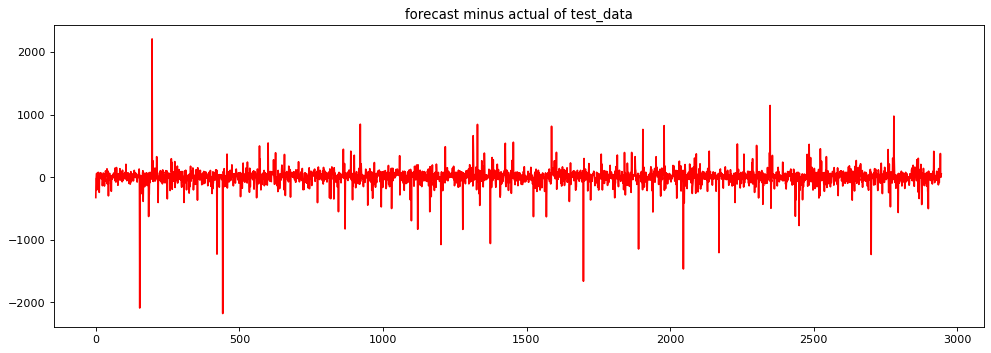

In [28]:
#  测试数据的预测值减实际值图

plt.figure(figsize=(15,5), dpi=80)   
plt.plot(range(2945),y_pred-y_test,color='r')
plt.title('forecast minus actual of test_data')  
plt.show()  # 展示画布   